In [1]:
import torch
import PIL.Image as Image
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import torch.optim as optim

In [5]:
from adaptive_color_deconvolution import acd, calculate_normalized_median_intensity, separate_stains, combine_stains

In [6]:
device = 'cuda'
template = TF.to_tensor(Image.open("../ref1.png")).unsqueeze(0)
target = torch.stack([TF.to_tensor(Image.open("../ref2.jpg")), TF.to_tensor(Image.open("../ref3.png"))])
#target = TF.to_tensor(Image.open("../ref3.png")).unsqueeze(0)

In [7]:
Ms, Ds, Ws = acd(torch.cat([template, target], dim=0), device=device, enable_autocast=True)
with torch.no_grad():
    M = Ms[0]
    hed = separate_stains(target, Ws[1:] @ Ds[1:])
    rgb = combine_stains(hed, M)
    

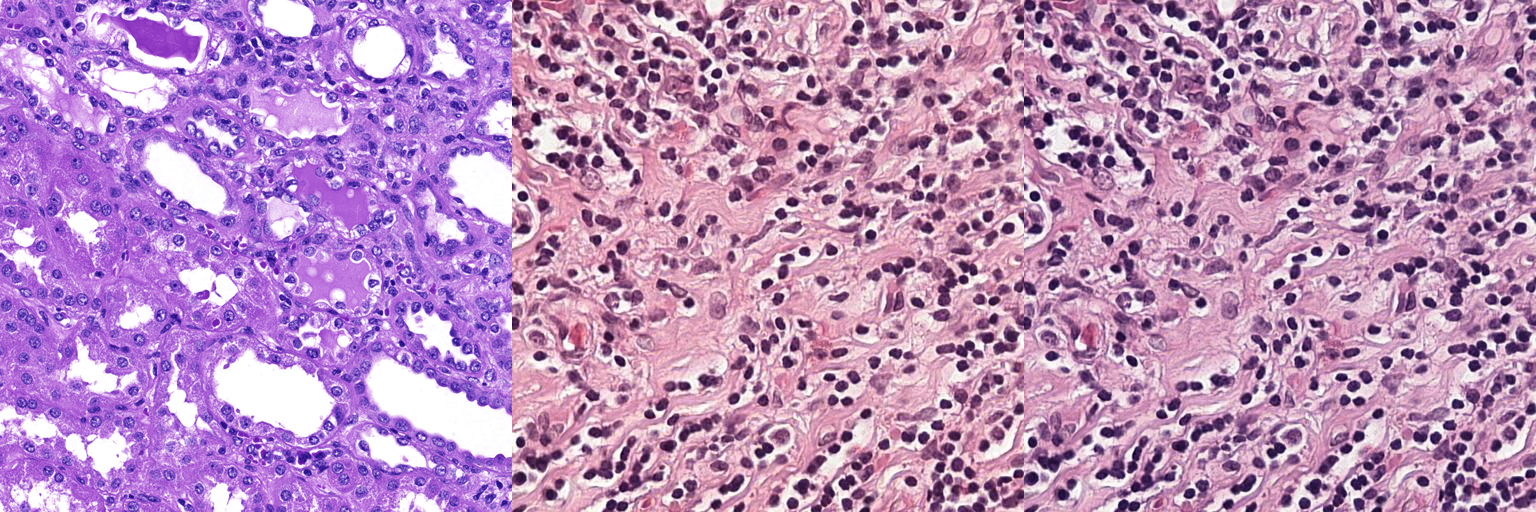

In [19]:
TF.to_pil_image(torch.cat([template.repeat(2, 1,1, 1), target, rgb], dim=3)[0])

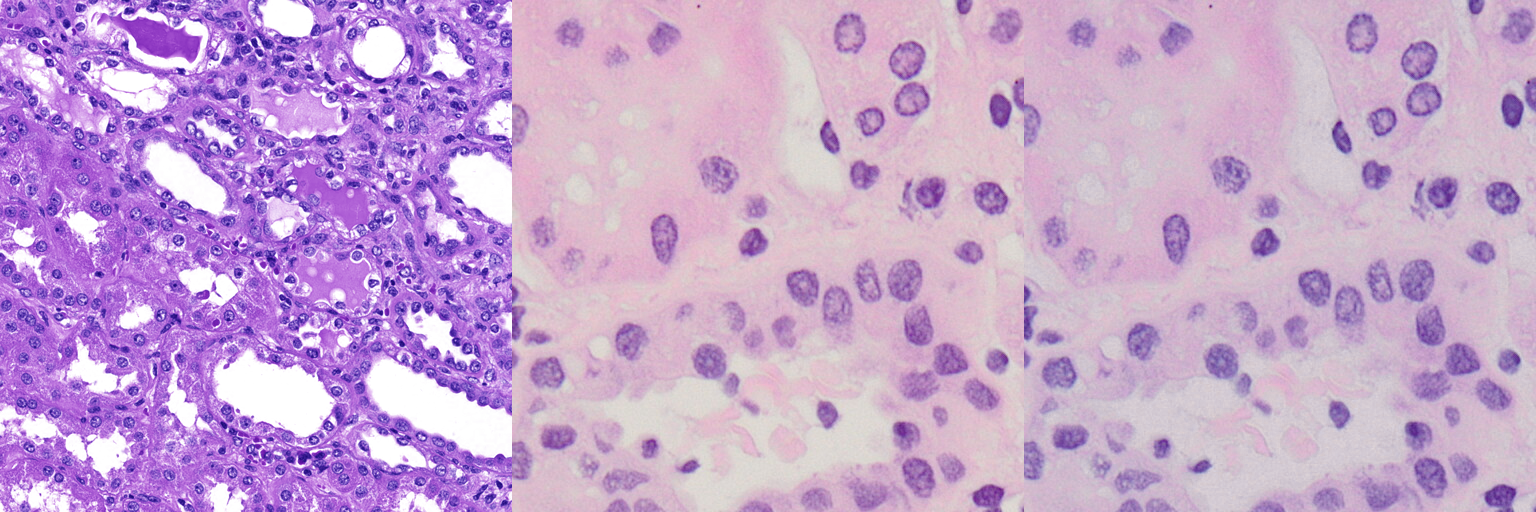

In [20]:
TF.to_pil_image(torch.cat([template.repeat(2, 1,1, 1), target, rgb], dim=3)[1])

In [ ]:
calculate_normalized_median_intensity(torch.cat([template, target, rgb], dim=0))